In [1]:
import matplotlib.pyplot as plt
from utils import data_utils
%matplotlib inline
import cv2
import numpy as np
from matplotlib import cm
from PIL import Image
from descartes.patch import PolygonPatch
from shapely import wkt
from shapely import affinity

In [2]:
im = Image.open('/Users/rogerjiang/Desktop/test.png')

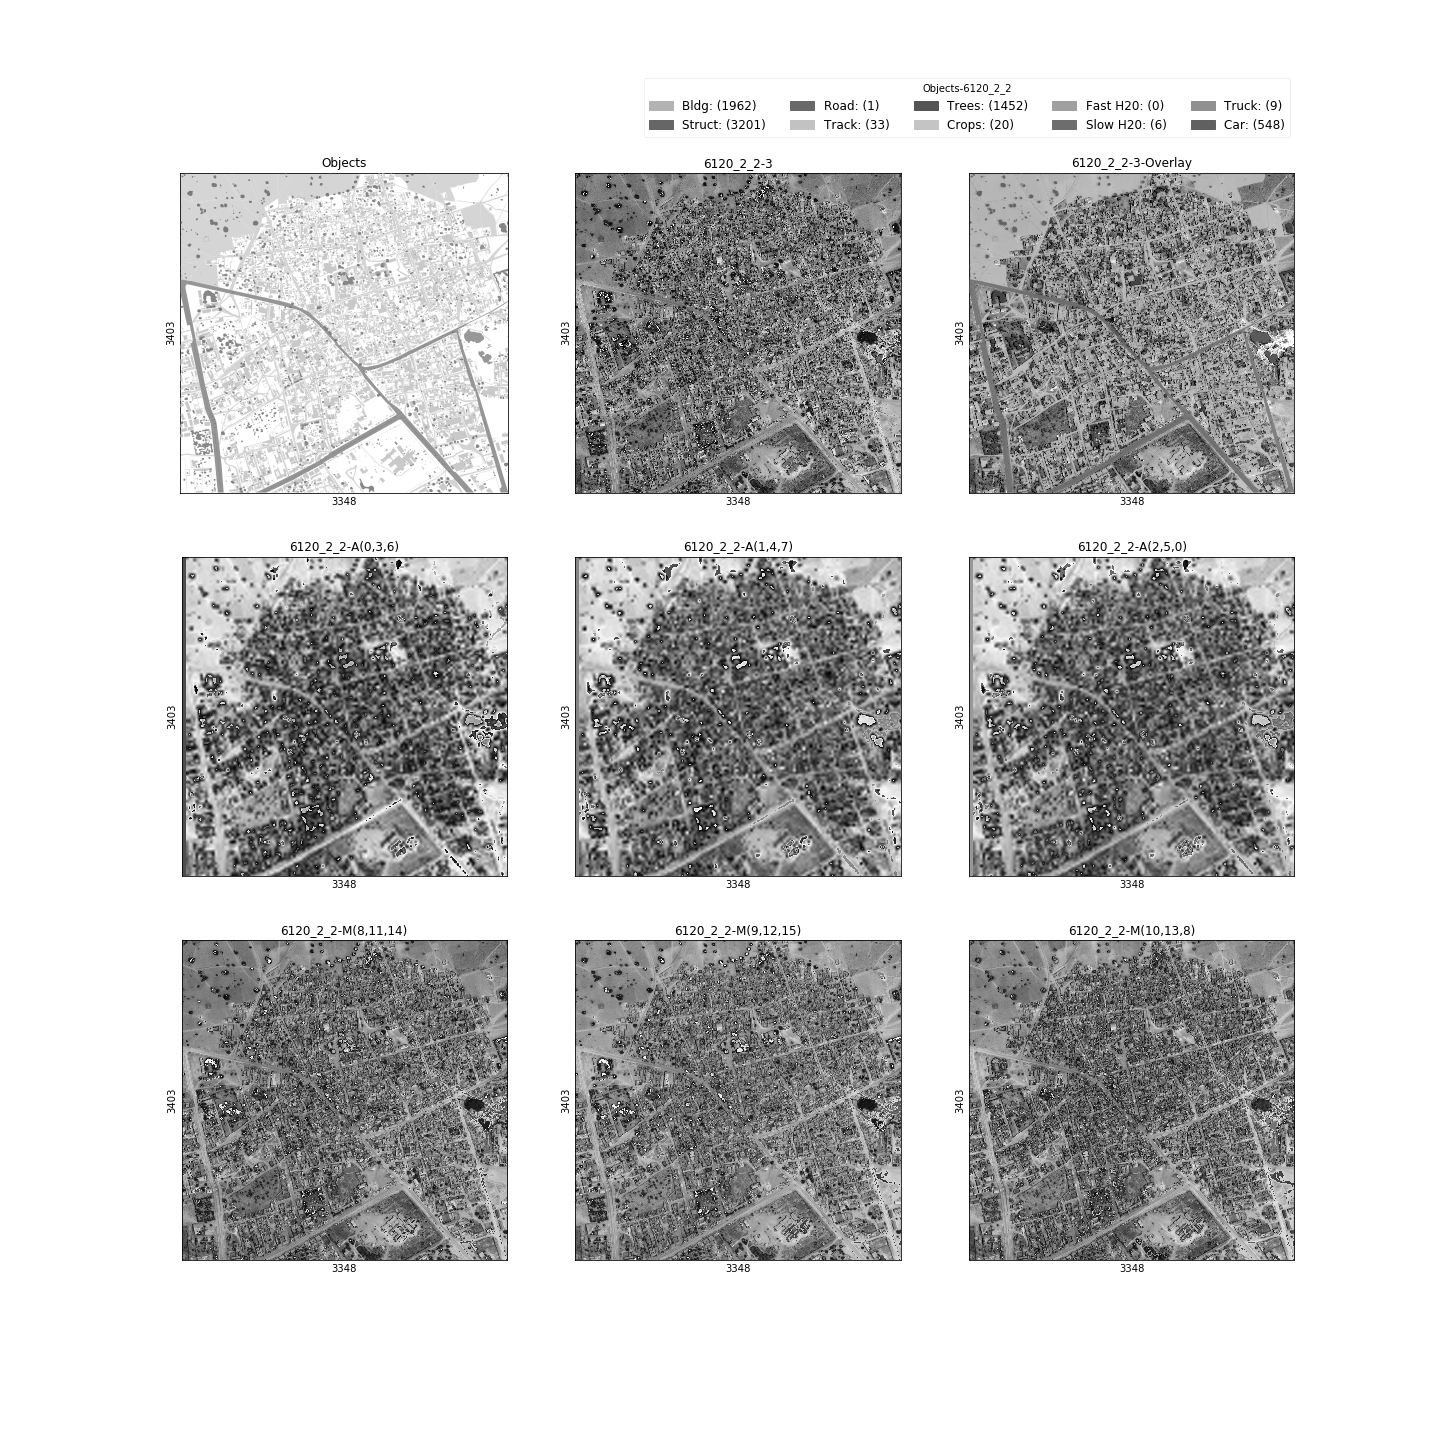

In [3]:
im.convert('LA')

In [4]:
im0 = data_utils.ImageData(1)

In [5]:
im0.get_image_path()

{'3': '/Users/rogerjiang/code/dstl_unet/data/three_band/6120_2_2.tif',
 'A': '/Users/rogerjiang/code/dstl_unet/data/sixteen_band/6120_2_2_A.tif',
 'M': '/Users/rogerjiang/code/dstl_unet/data/sixteen_band/6120_2_2_M.tif',
 'P': '/Users/rogerjiang/code/dstl_unet/data/sixteen_band/6120_2_2_P.tif'}

In [6]:
im0.load_image()

Working on image No. 0: 6040_2_2 

prepare image patches [                    ]  Working on image No. 1: 6120_2_2 

prepare image patches [                    ]  Working on image No. 2: 6120_2_0 

prepare image patches [                    ]  Working on image No. 3: 6090_2_0 

prepare image patches [                    ]  Working on image No. 4: 6040_1_3 

prepare image patches [                    ]  Working on image No. 5: 6040_1_0 

prepare image patches [                    ]  Working on image No. 6: 6100_1_3 

prepare image patches [                    ]  Working on image No. 7: 6010_4_2 

prepare image patches [                    ]  Working on image No. 8: 6110_4_0 

prepare image patches [                    ]  Working on image No. 9: 6140_3_1 

prepare image patches [               

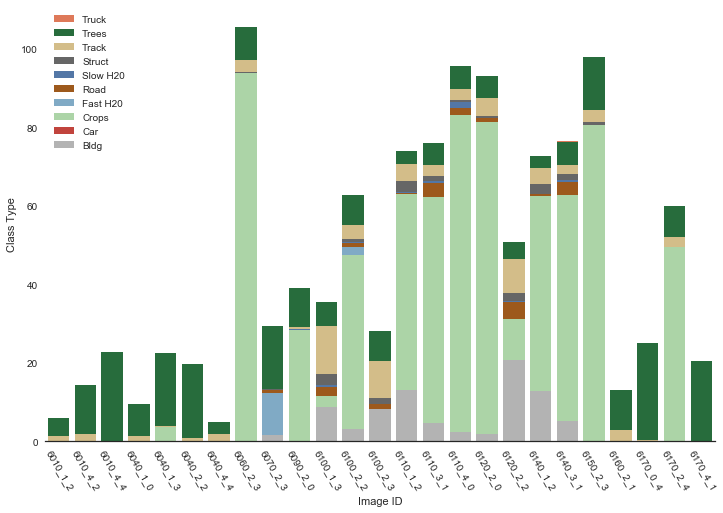

In [7]:
data_utils.plot_bar_stats()

In [8]:
im0.image_size

(3348, 3403)

Working on image No. 0: 6040_2_2 

prepare image patches [                    ]  Working on image No. 1: 6120_2_2 

prepare image patches [                    ]  Working on image No. 2: 6120_2_0 

prepare image patches [                    ]  Working on image No. 3: 6090_2_0 

prepare image patches [                    ]  Working on image No. 4: 6040_1_3 

prepare image patches [                    ]  Working on image No. 5: 6040_1_0 

prepare image patches [                    ]  Working on image No. 6: 6100_1_3 

prepare image patches [                    ]  Working on image No. 7: 6010_4_2 

prepare image patches [                    ]  Working on image No. 8: 6110_4_0 

prepare image patches [                    ]  Working on image No. 9: 6140_3_1 

prepare image patches [               

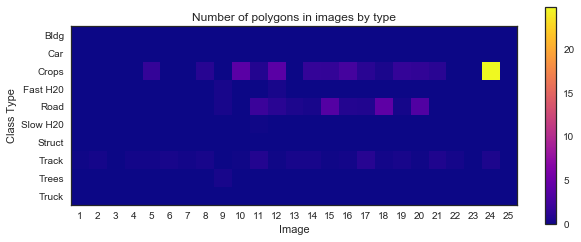

In [9]:
data_utils.plot_stats('meanArea', 'Number of polygons in images by type')

In [10]:
df = data_utils.collect_stats()

Working on image No. 0: 6040_2_2 

prepare image patches [                    ]  Working on image No. 1: 6120_2_2 

prepare image patches [                    ]  Working on image No. 2: 6120_2_0 

prepare image patches [                    ]  Working on image No. 3: 6090_2_0 

prepare image patches [                    ]  Working on image No. 4: 6040_1_3 

prepare image patches [                    ]  Working on image No. 5: 6040_1_0 

prepare image patches [                    ]  Working on image No. 6: 6100_1_3 

prepare image patches [                    ]  Working on image No. 7: 6010_4_2 

prepare image patches [                    ]  Working on image No. 8: 6110_4_0 

prepare image patches [                    ]  Working on image No. 9: 6140_3_1 

prepare image patches [               

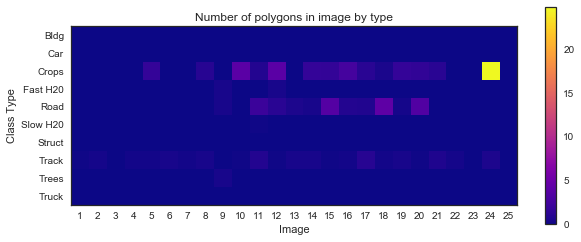

In [11]:
pvt = df.pivot(index='CLASS', columns='ImageId', values='meanArea')
pvt.fillna(0, inplace=True)
fig, ax = plt.subplots(figsize=(10, 4))
im = ax.imshow(pvt, interpolation='nearest', cmap=plt.cm.plasma, extent=[0, 25, 10, 0])
ax.set_xticks(np.arange(0.5, 25.4, 1))
ax.set_yticks(np.arange(0.5, 10.4, 1))
ax.set_xticklabels(np.arange(1,26,1))
ax.set_yticklabels(pvt.index)
ax.set_xlabel('Image')
ax.set_ylabel('Class Type')
ax.set_title('Number of polygons in image by type')
fig.colorbar(im)

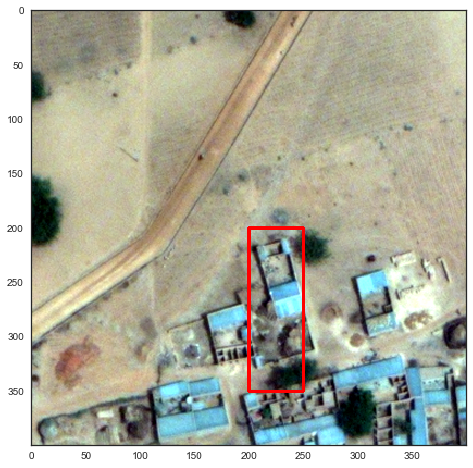

In [51]:
xx = im0.apply_crop(patch_size=400)
xx = im0.crop_image[:,:,:3].copy()
cv2.rectangle(xx, (200,200), (250,350), (2**10, 0, 0) ,2)
plt.imshow(scale_percentile(xx))

In [ ]:
xx = pvt[['6110_1_2', '6140_1_2']]
from scipy.stats import pearsonr
pearsonr(pvt['6110_1_2'], pvt['6140_1_2'])[0]

In [ ]:
pvt = df.pivot(index='CLASS', columns='ImageId', values='totalArea')
pvt.fillna(0, inplace=True)
fig, ax = plt.subplots(figsize=(10, 4))
ax.imshow(pvt)


In [ ]:
import seaborn as sns

In [ ]:
percAreaCS = np.cumsum(pvt, axis=0)

In [ ]:
pvt

In [ ]:
percAreaCS.loc['Truck']

In [ ]:
import seaborn as sns

In [ ]:
data_utils.CLASSES 

In [ ]:
data_utils.COLORS

In [ ]:
data_utils.CLASSES.values().index(class_id)

In [ ]:
percAreaCS = np.cumsum(pvt)
sns.set_style('white')
sns.set_context({'figure.figsize': (12, 8)})
for cl in range(1, 11):
    class_id = percAreaCS.index[-cl]
    class_ind = data_utils.CLASSES.values().index(class_id)+1
    ax = sns.barplot(
            y=percAreaCS.loc[class_id], 
            x=percAreaCS.columns, 
            color=data_utils.COLORS[class_ind], 
            label=data_utils.CLASSES[class_ind])
    
l = plt.legend(loc=2)
sns.despine(left=True)
ax.set_xlabel('Image Id')
ax.set_ylabel('Total Area')
ax.set_xticklabels(percAreaCS.columns, rotation=-60)

In [ ]:
pvt = df.pivot(index='CLASS', columns='ImageId', values='totalArea')
fig, ax = plt.subplots(figsize=(10, 4))
ax.imshow(pvt)
pvt.fillna(0, inplace=True)

In [ ]:
df = data_utils.image_stat('6060_2_3')

In [ ]:
df

In [ ]:
data_utils.get_image_area('6120_2_2')

In [ ]:
im0.apply_crop(patch_size=100, ref_point=[1000, 1000], method='random')

In [ ]:
def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.299, 0.587, 0.144])

In [ ]:
im0.visualize_images()
plt.savefig('/Users/rogerjiang/Desktop/test.png')

In [ ]:
data_utils.train_wkt_v4.head()

In [ ]:
im0.three_band_image.shape

In [ ]:
data_utils.CLASSES

In [22]:
def scale_percentile(matrix):
    """Fixes the pixel value range to 2%-98% original distribution of values"""
    orig_shape = matrix.shape
    if len(orig_shape) == 3:
        matrix = np.reshape(matrix, [matrix.shape[0]*matrix.shape[1], orig_shape[2]]).astype(float)
    elif len(orig_shape) == 2:
        matrix = np.reshape(matrix, [matrix.shape[0]*matrix.shape[1]]).astype(float)
    
    # Get 2nd and 98th percentile
    mins = np.percentile(matrix, 1, axis=0)
    maxs = np.percentile(matrix, 99, axis=0) - mins
    
    matrix = (matrix - mins)/maxs
    matrix = np.reshape(matrix, orig_shape)
    matrix = matrix.clip(0,1)
    return matrix

In [ ]:
im0.imageId

In [ ]:
df = data_utils.train_wkt_v4
mm = df[df.ImageId == '6120_2_2']
nn = mm[mm.ClassId == 10]
polygons = wkt.loads(nn.MultipolygonWKT.values[0])
len(polygons)

In [ ]:
np.sum([poly.area for poly in polygons])
    

In [ ]:
polygons.area

In [ ]:
im0.image_size[0] / im0._xymax[1], im0.image_size[1] / im0._xymax[0]

In [ ]:
im0.image_size / np.array([-im0._xymax[1], im0._xymax[0]])

In [ ]:
fig, axs = plt.subplots(figsize=[10,10])
#im0.apply_crop(patch_size=3300, ref_point=[0, 0], method='random')
#axs.imshow(scale_percentile(rgb2gray(im0.crop_image[:,:,:3])), cmap=cm.gray, vmin=0, vmax=1.)
#axs.add_patch(PolygonPatch(polygon=polygons, lw=0, alpha=0.7, color='0.4', zorder=1))
axs.add_patch(PolygonPatch(polygon=affinity.scale(polygons, xfact=370354., yfact=370374., origin=[0.,0.,0.]), lw=0.1, alpha=1., color='0.4', zorder=1))
axs.set_xlim([0, im0.image_size[0]])
axs.set_ylim([-im0.image_size[1], 0])
axs.autoscale_view()

In [ ]:
plt.figure(figsize=[20,20])
plt.imshow(scale_percentile(im0.three_band_image))

In [ ]:
im0.imageId

In [ ]:
plt.figure(figsize=[20,20])
plt.imshow(np.sum(im0.label, axis=-1))

In [ ]:
im0._xymax

In [ ]:
im0.image_size

In [ ]:
data_utils.CLASSES

In [ ]:
fig, axs = plt.subplots(1,2)

axs[0].imshow(im0.three_band_image)
axs[1].imshow(np.sum(im0.label, axis=-1))

In [ ]:
data_utils.all_train_names

In [ ]:
for image_id in data_utils.all_train_names:
    mat_cui = np.load('../xj/results/image_alignment/{}_warp_matrix_a.npz'.format(image_id))
    mat = np.load('./utils/image_alignment/{}_warp_matrix_a.npz'.format(image_id))
    print mat_cui
    print mat
    print 

In [ ]:
image_untouched = im0.read_image()

In [ ]:
image_untouched['A'].shape

In [ ]:
import os

In [ ]:
[nx, ny] = im0.image_size
xx = cv2.resize(im0.three_band_image, (ny, nx), interpolation=cv2.INTER_CUBIC)

In [ ]:
fig, ax = plt.subplots(figsize=[10,10])
ax.imshow(scale_percentile(xx))
ax.set_xlabel(xx.shape[0])
ax.set_ylabel(xx.shape[1])
ax.set_xticks([])
ax.set_yticks([])
ax.set_title(im0.imageId)

In [ ]:
fig, ax = plt.subplots(figsize=[10,10])
data_utils.plot_image(img=scale_percentile(im0.sixteen_band_image), ax=ax, image_id=im0.imageId, image_key='M', selected_channel=[7,10,13])

In [ ]:
im0.imageId

In [ ]:
data_utils.CLASSES.keys()

In [ ]:
im0.visualize_images()

In [ ]:
print '\b'*22

In [ ]:
import sys

In [ ]:
print '\b.',
sys.stdout.flush()